# Machine Learning Project
### Spring 2024
## Predicting Hotel Reservation Cancellations

<br>
<br>
<p align="center">
<img 
  src="./files/hotel_bookings_image.png" 
  alt="Hotel Bookings" 
  width="800"
  height="650"
/>
</p>

<br>

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `bookings_df` data frame in this project. This data set contains information on over 5,000 reservations made at a U.S. hotel. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their hotel reservations and develop machine learning algorithms that will predict the likelihood of a customer canceling their reservation in the future.

## Hotel Bookings Data

The `bookings_df` data frame contains information about bookings (reservations) for a U.S. based hotel. 

The hotel is looking to see if it can determine the factors that lead to customers canceling their reservations and develop a machine learning model that can estimate the likelihood of a reservation cancellation in the future.

To maintain profits, hotels must maximize the number of customers staying at their properties at any time. Reservation cancellations are a significant problem for hotels, as they can leave many rooms unoccupied - leading to lost revenue.

The hotel has experienced record levels of cancellations in the past couple of years and this is leading to declining revenue.

The hotel's goal is to become better at identifying customers at risk of canceling their reservation.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers cancelling their reservation?
- Is it possible to predict whether a customer will cancel their reservation? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the hotel can implement to reduce the risk of losing their reservations?

<br>

The data set contains last years hotel bookings (reservations) along with customer and room attributes.

The outcome variable in this data is `booking_status`. This variable records whether a customer eventually cancelled their reservation and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'canceled' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	         | Definition                                 	                                    | Data Type |
|:-------------------------------|:---------------------------------------------------------------------------------|:----------|
| booking_status                 | Reservation outcome (canceled or not_canceled)                                   | Factor    |
| booking_type                   | How the reservation was booked (online, moblie app,...)                          | Factor    |
| previous_cancellations         | Number of previous cancellations for this customer, if any                       | Numeric   |
| previous_non_canceled_bookings | Number of previous bookings that were not canceled                               | Numeric   |
| adults                         | Number of adults for this booking (reservation)                                  | Numeric   |
| children                       | Number of children for this booking (reservation)                                | Numeric   |
| weekend_nights                 | Number of weekend nights (Sat/Sun) for this booking (reservation)                | Numeric   |
| week_nights                    | Number of week nights (Mon - Fri) for this booking (reservation)                 | Numeric   |
| room_price                     | Room price (U.S. Dollars)                                                        | Numeric   |
| special_requests               | Number of special requests made by customer for this reservation                 | Numeric   |
| meal_plan                      | Meal plan selected by customer for this reservation                              | Factor    |
| reserved_parking_space         | Did the customer select a reserved parking space (0/1)                           | Numeric   |
| room_type                      | Room type selected by customer                                                   | Factor    |
| lead_time_days                 | Number of days in advance that the reservation was booked                        | Numeric   |
| arrival_occupancy_season       | In which period of the year will the customer arrive? (low, moderate, peak)      | Numeric   |

In [90]:
# Load data
library(tidyverse)

bookings_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/bookings.rds'))

In [2]:
# View data
bookings_df

booking_status,booking_type,previous_cancellations,previous_non_canceled_bookings,adults,children,weekend_nights,week_nights,room_price,special_requests,meal_plan,reserved_parking_space,room_type,lead_time_days,arrival_occupancy_season
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>
not_canceled,online,0,0,2,0,0,2,87.78,2,american,1,suite,12,peak
canceled,online,0,0,2,0,1,1,126.90,0,continental,0,suite,89,moderate
canceled,online,0,0,2,0,0,1,85.50,0,american,0,suite,139,peak
canceled,online,0,0,2,1,1,1,164.25,1,modified_american,0,suite,188,peak
canceled,online,0,0,2,0,1,2,75.00,0,continental,0,suite,418,moderate
not_canceled,mobile_app,0,0,2,0,0,1,120.00,0,continental,0,suite,56,peak
not_canceled,travel_agency,0,0,2,0,0,2,128.00,1,american,1,suite,1,moderate
not_canceled,online,0,0,1,0,0,1,152.00,2,continental,0,suite,14,low
not_canceled,online,0,1,2,0,1,1,93.60,1,continental,1,suite,64,low


# Exploratory Data Analysis (50 Points)

In this section, you must think of at least 5 relevant questions that explore the relationship between `booking_status` and the other variables in the `bookings_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not cancel their reservations.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**:
Is there a relationship between the room price and cancelations?


**Answer**:
No, there is no relationship between room price and whether the customer canceled their booking. Looking at the box plot, the lower and upper quartiles are relatively similar with a difference in average price of only \$6. Both canceled and non-canceled bookings have a minimum price of \$75. Each of the booking status’ have a number of outliers up to ~\$300 but, one canceled booking has a value of \$540. This max value is important to note as it may have an effect on our model as an outlier.

## Supporting Analysis

In [2]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

booking_status,avg_price,max_price,min_price
<fct>,<dbl>,<dbl>,<dbl>
canceled,111.9145,540.00,75
not_canceled,105.9077,283.67,75


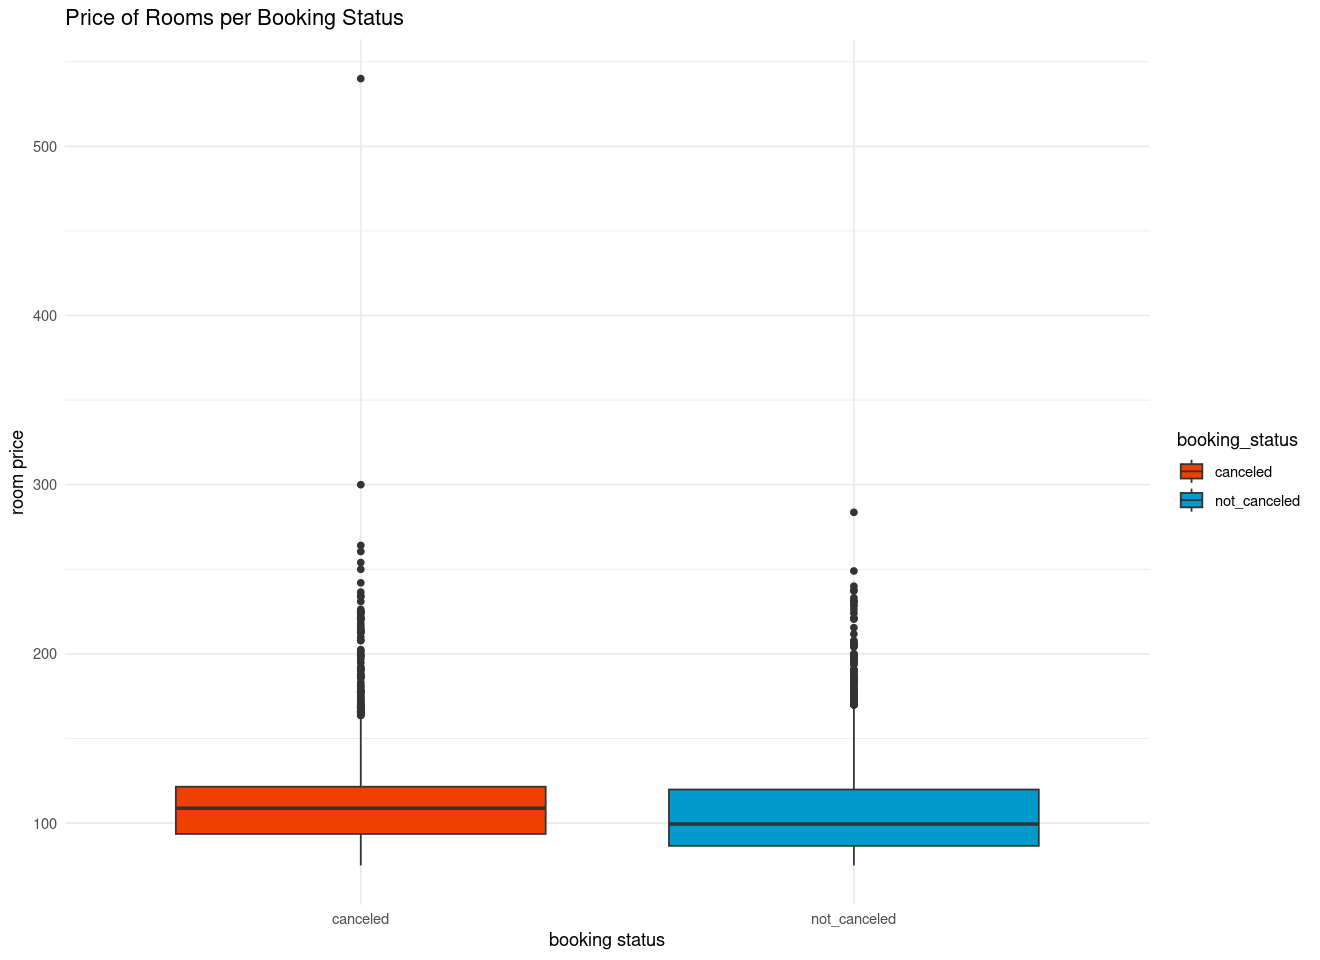

In [3]:
ggplot(bookings_df)+
geom_boxplot(aes(x=booking_status, y=room_price, fill = booking_status) )+
scale_fill_manual(values=c("orangered2", "deepskyblue3"))+
labs(title= 'Price of Rooms per Booking Status', y='room price', x='booking status')+
theme_minimal()

price <- bookings_df %>%
	group_by(booking_status) %>%
	summarise(avg_price = mean(room_price),
			  max_price = max(room_price),
			  min_price = min(room_price))
price

## Question 2


**Question**:
Is there a relationship between canceled bookings and occupancy season?


**Answer**:
There seems to be a slight difference in canceled bookings depending on season. During the “low” season, the proportion of non-canceled bookings (79.95%) is much higher as shown in the bar chart. As the seasons change from low to moderate to peak, the proportion of canceled bookings increase, 20.05% to 34.48% to 43.63%. This suggests that bookings are more likely to cancel in the peak season.

## Supporting Analysis


arrival_occupancy_season,booking_status,percentage_canceled_per_season
<fct>,<fct>,<dbl>
low,canceled,20.05
low,not_canceled,79.95
moderate,canceled,34.48
moderate,not_canceled,65.52
peak,canceled,43.63
peak,not_canceled,56.37


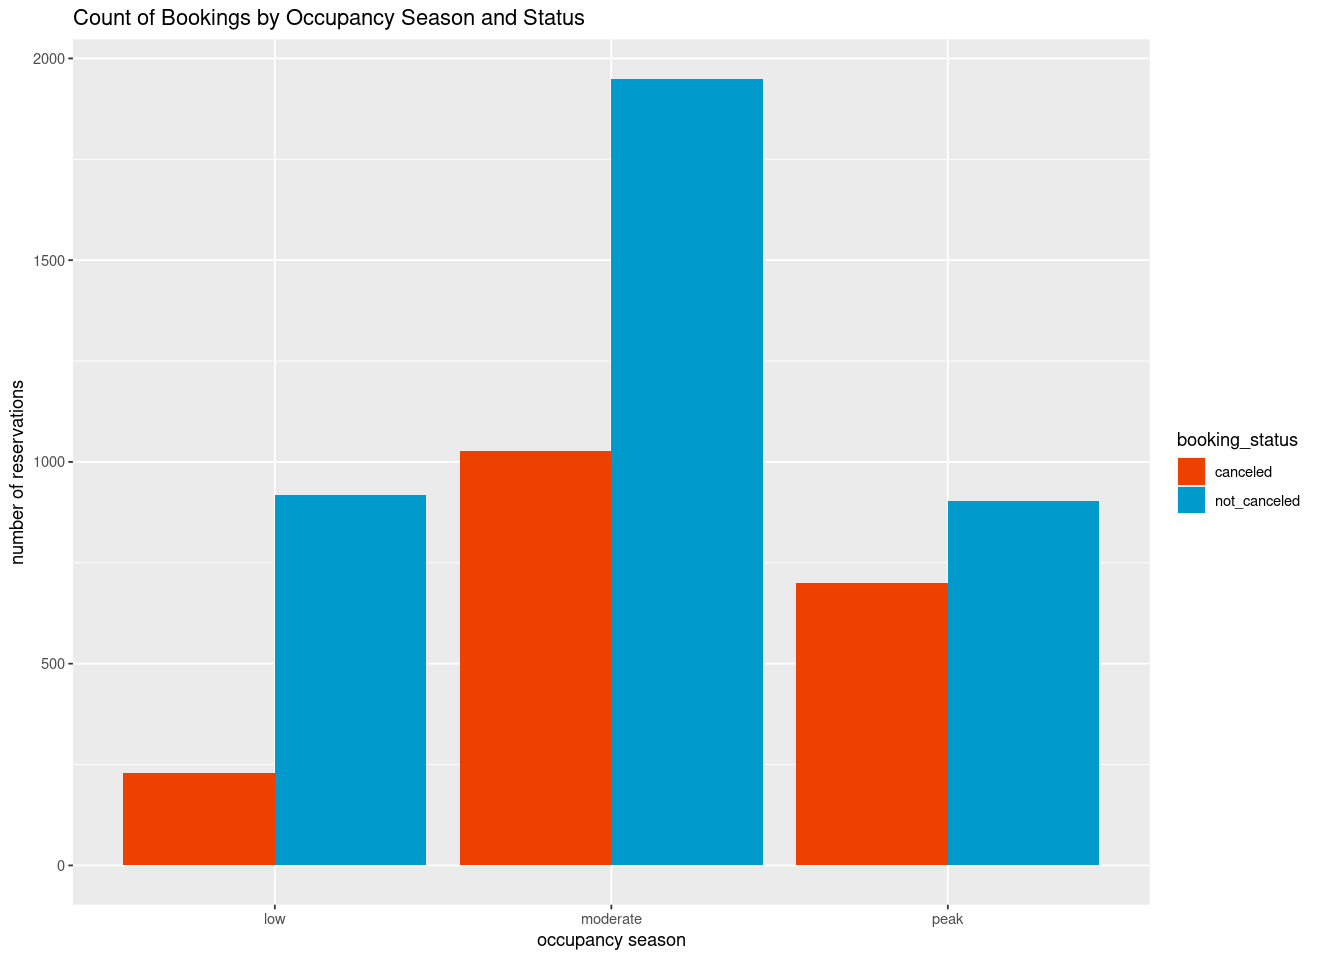

In [4]:
percent_cancel_season <- bookings_df %>%
	group_by(arrival_occupancy_season) %>%
	mutate(count=n())%>%
	group_by(arrival_occupancy_season,booking_status) %>%
	mutate(count_book = n())%>%
	reframe(percentage_canceled_per_season = round(((count_book/count)*100),2))%>%
	unique()
percent_cancel_season



ggplot(bookings_df, aes(x=arrival_occupancy_season, fill=booking_status)) +
geom_bar(position='dodge')+
scale_fill_manual(values=c("orangered2", "deepskyblue3"))+
labs(title= 'Count of Bookings by Occupancy Season and Status', y='number of reservations', x='occupancy season')

## Question 3


**Question**:
Is there a relationship between the time before booking and cancelation?


**Answer**:
Looking first at the canceled bookings, there is a large, almost uniform, distribution in lead time before booking from 0-418. The non-canceled bookings have a right skew with the most non-canceled bookings at 0 days lead time. There is a large difference between the median lead time of canceled and non-canceled  bookings, 130 days and 37 days respectively.

## Supporting Analysis


booking_status,mean_lead,min_lead,max_lead,median_lead
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
canceled,142.48849,0,418,130
not_canceled,55.86101,0,377,37


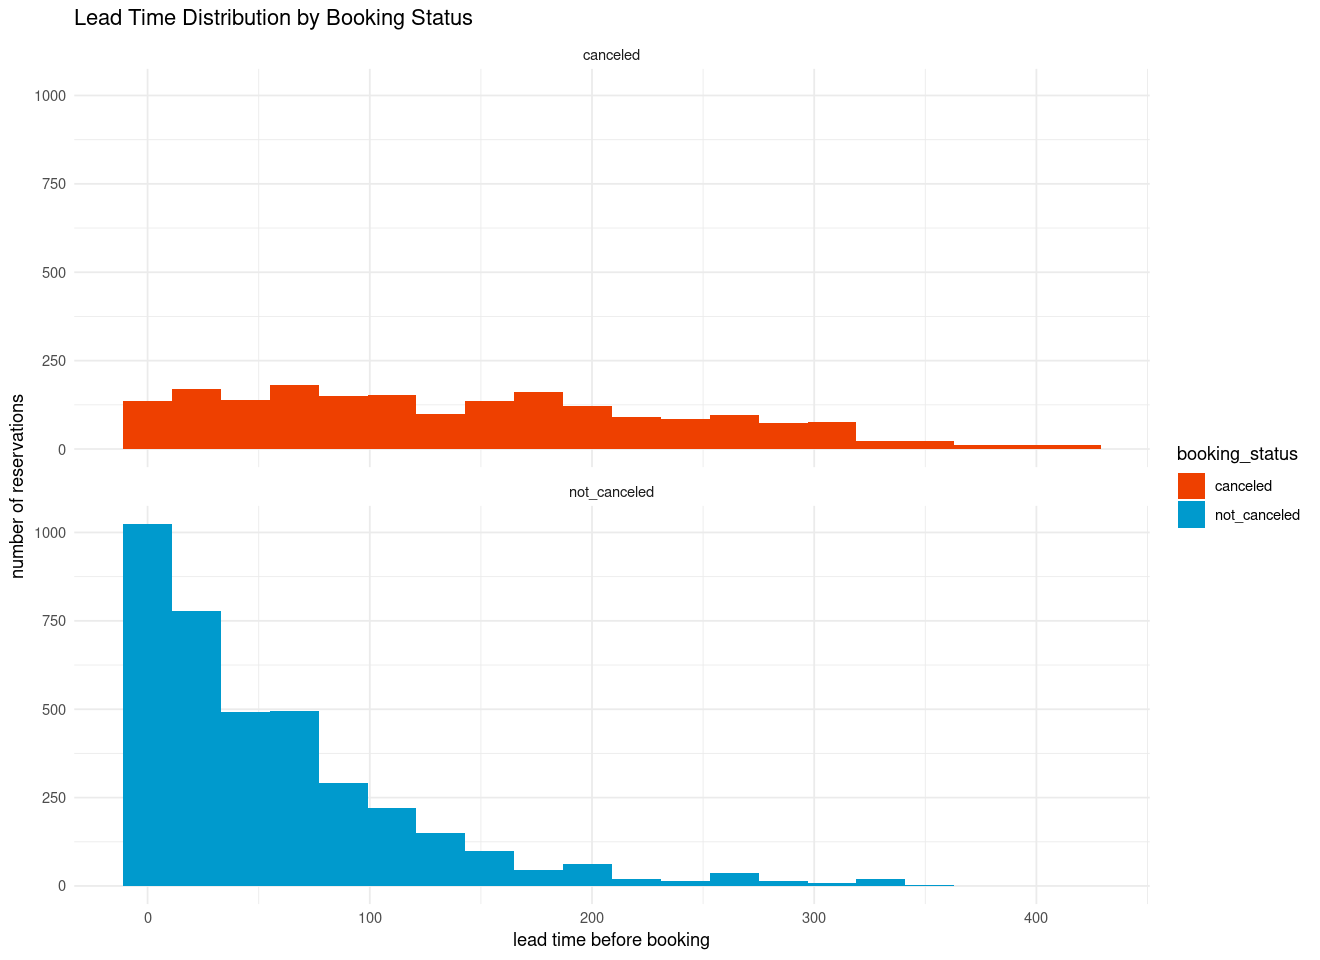

In [6]:
lead_time <- bookings_df %>%
	group_by(booking_status)%>%
	summarise(mean_lead = mean(lead_time_days),
			 min_lead = min(lead_time_days),
			 max_lead = max(lead_time_days),
			 median_lead = median(lead_time_days))
lead_time

ggplot(bookings_df, aes(x=lead_time_days, fill = booking_status))+
geom_histogram(bins=20)+
facet_wrap(~booking_status, nrow=2)+
scale_fill_manual(values=c("orangered2", "deepskyblue3"))+
labs(title= 'Lead Time Distribution by Booking Status', y='number of reservations', x='lead time before booking')+
theme_minimal()


## Question 4


**Question**:
Is there a relationship to the length of stay and booking status?


**Answer**:
No, comparing the histograms of the length of stay and booking status, the distributions are very similar. Both histograms show a peak number of reservations at 3 nights, which account for about 40% of each booking status group with the percent of canceled and non-canceled reservations decreasing with the length of stay.


## Supporting Analysis


booking_status,mean_stay,min_stay,max_stay,median_stay
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
canceled,3.137084,0,24,3
not_canceled,2.762069,0,21,3


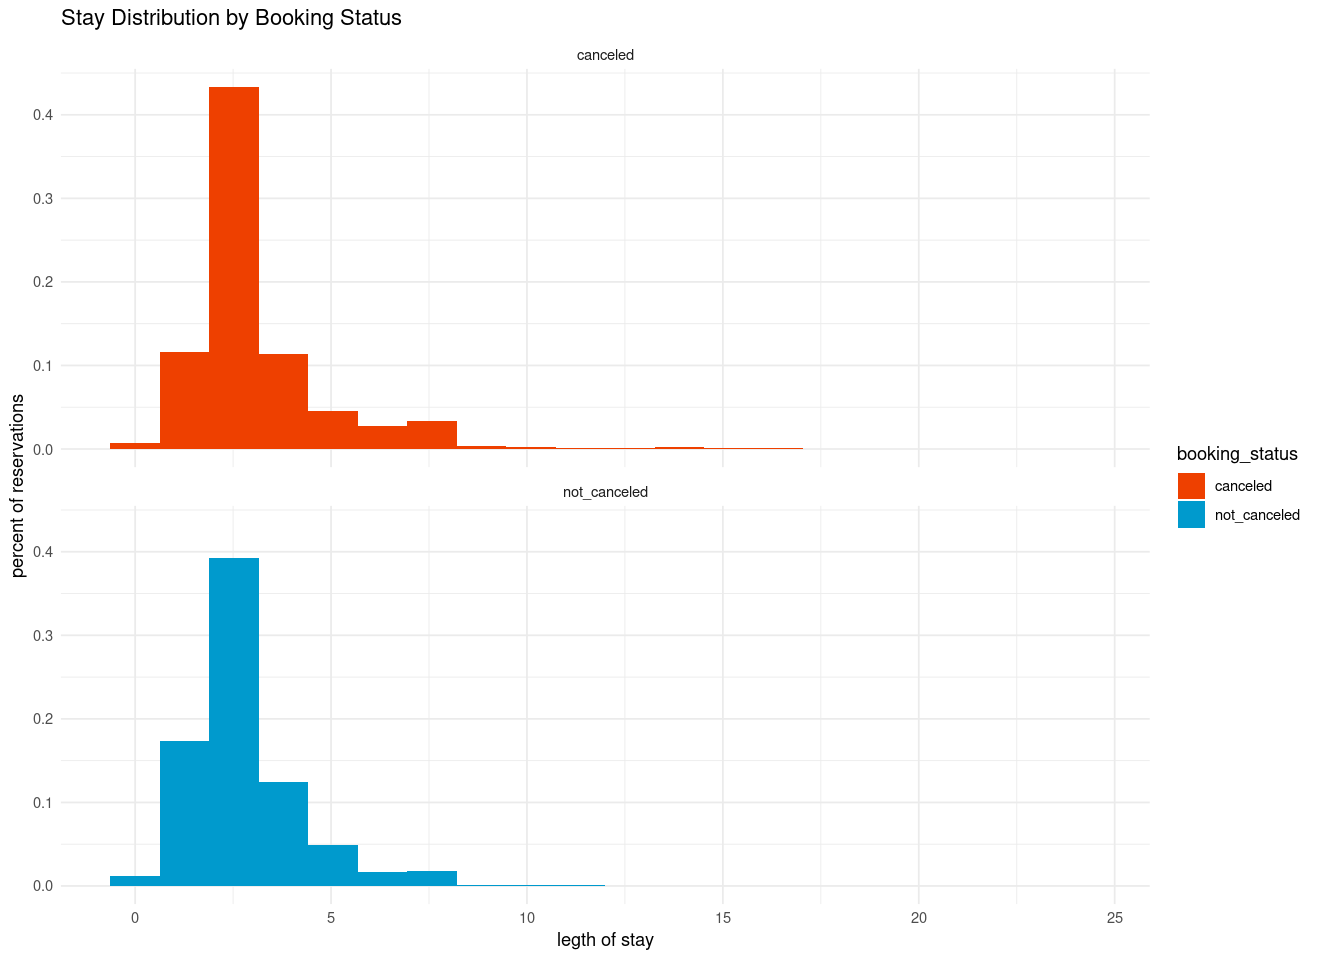

In [7]:
length_stay <- bookings_df %>%
	mutate(total_length = weekend_nights + week_nights) 

length_stay_sum <- bookings_df %>%
	mutate(total_length = weekend_nights + week_nights) %>%
	group_by(booking_status)%>%
	summarise(mean_stay = mean(total_length),
			 min_stay = min(total_length),
			 max_stay = max(total_length),
			 median_stay = median(total_length))
length_stay_sum

ggplot(length_stay, aes(x=total_length, fill = booking_status))+
geom_histogram(bins=20, aes(y=after_stat(density)))+
facet_wrap(~booking_status, nrow=2)+
scale_fill_manual(values=c("orangered2", "deepskyblue3"))+
labs(title= 'Stay Distribution by Booking Status', y='percent of reservations', x='legth of stay')+
theme_minimal()

## Question 5


**Question**:
Is there a relationship between booking type (online, app, corporate, travel agency) and booking status?


**Answer**:
Of people who booked online, in the mobile app, and through a travel agency, it looks as though cancelations account for about 1/3 of the total bookings as the cancelations are about half the number of non-canceled bookings. We can confirm this looking at the table of percentages. 36.51% of online bookings were canceled, 33.48% app bookings were canceled, and 30.31% of travel agency bookings were canceled. This suggests that there is no relationship between booking type and booking status within these booking types. Corporate partnerships though, only have 11.64% canceled bookings which is good for business but account for a small number of bookings compared to online and mobile app reservations. 



## Supporting Analysis


Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


booking_type,booking_status,percentage_canceled_type
<fct>,<fct>,<dbl>
online,canceled,36.51
online,not_canceled,63.49
mobile_app,canceled,33.48
mobile_app,not_canceled,66.52
corporate_partner,canceled,11.64
corporate_partner,not_canceled,88.36
travel_agency,canceled,30.31
travel_agency,not_canceled,69.69


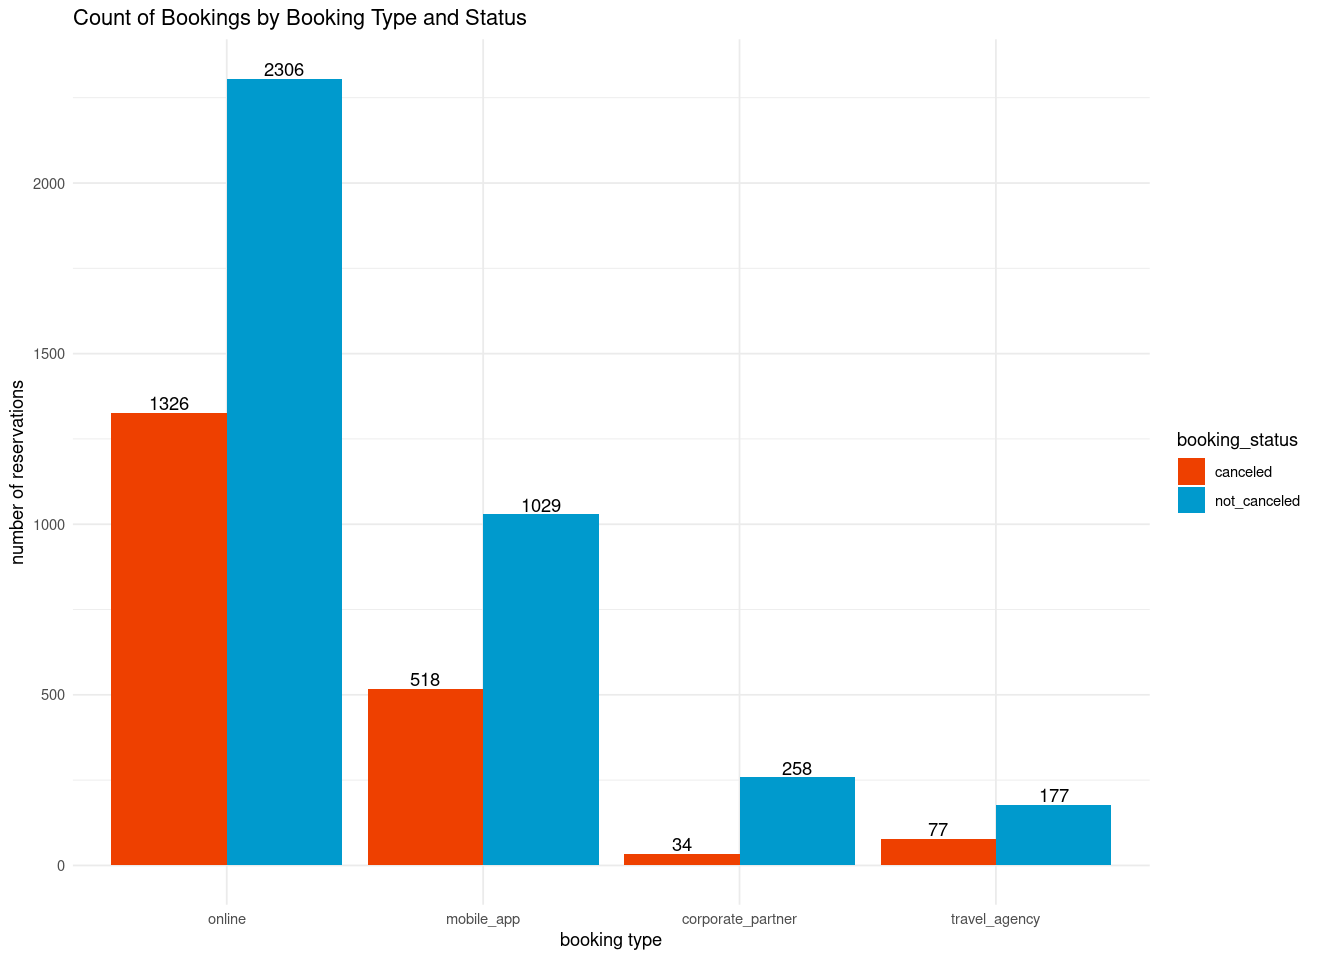

In [8]:
ggplot(bookings_df, aes(x=booking_type, fill=booking_status)) +
geom_bar(position='dodge')+
scale_fill_manual(values=c("orangered2", "deepskyblue3"))+
theme_minimal()+
labs(title= 'Count of Bookings by Booking Type and Status', y='number of reservations', x='booking type')+
geom_text(stat='count', aes(label=..count..), vjust =-0.2,position = position_dodge(.9))

percent_book <- bookings_df %>%
	group_by(booking_type) %>%
	mutate(count=n())%>%
	group_by(booking_type,booking_status) %>%
	mutate(count_book = n())%>%
	reframe(percentage_canceled_type = round(((count_book/count)*100),2))%>%
	unique()
percent_book

## Question 6


**Question**:
Is there a relationship between previous customers (either having canceled or not canceled booking) and thieir booking status?


**Answer**:
Yes, almost all customers who have booked with the hotel and not canceled previously did not cancel their reservation(181 of 182). Most customers who previously booked with the hotel and canceled also did not cancel their reservation (116 of 124).

In [9]:
prev_res_non_cancel <- bookings_df %>%
	filter(previous_non_canceled_bookings>0) %>%
	group_by(booking_status) %>%
	summarise(n_prev_non_cancel=n())
prev_res_non_cancel

prev_res_cancel <- bookings_df %>%
	filter(previous_cancellations>0) %>%
	group_by(booking_status) %>%
	summarise(n_prev_cancel=n())
prev_res_cancel


booking_status,n_prev_non_cancel
<fct>,<int>
canceled,1
not_canceled,181


booking_status,n_prev_cancel
<fct>,<int>
canceled,8
not_canceled,116


## Question 7


**Question**:
Is there a relationship between requests such as parking spaces and special requests and booking status?


**Answer**:
Yes, from the histogram of special requests, we can see clearly that a majority of reservations with special requests (1,2,3) did not cancel. 100% of reservations with 3 special requests did not cancel. As the number of special requests go up the ratio of non-canceled bookings goes up. Similarly, reservations with a requested parking space do not cancel 86.16% of the time.

special_requests,booking_status,percentage_canceled_req
<dbl>,<fct>,<dbl>
0,canceled,45.40
0,not_canceled,54.60
1,canceled,24.69
1,not_canceled,75.31
2,canceled,14.74
2,not_canceled,85.26
3,not_canceled,100.00


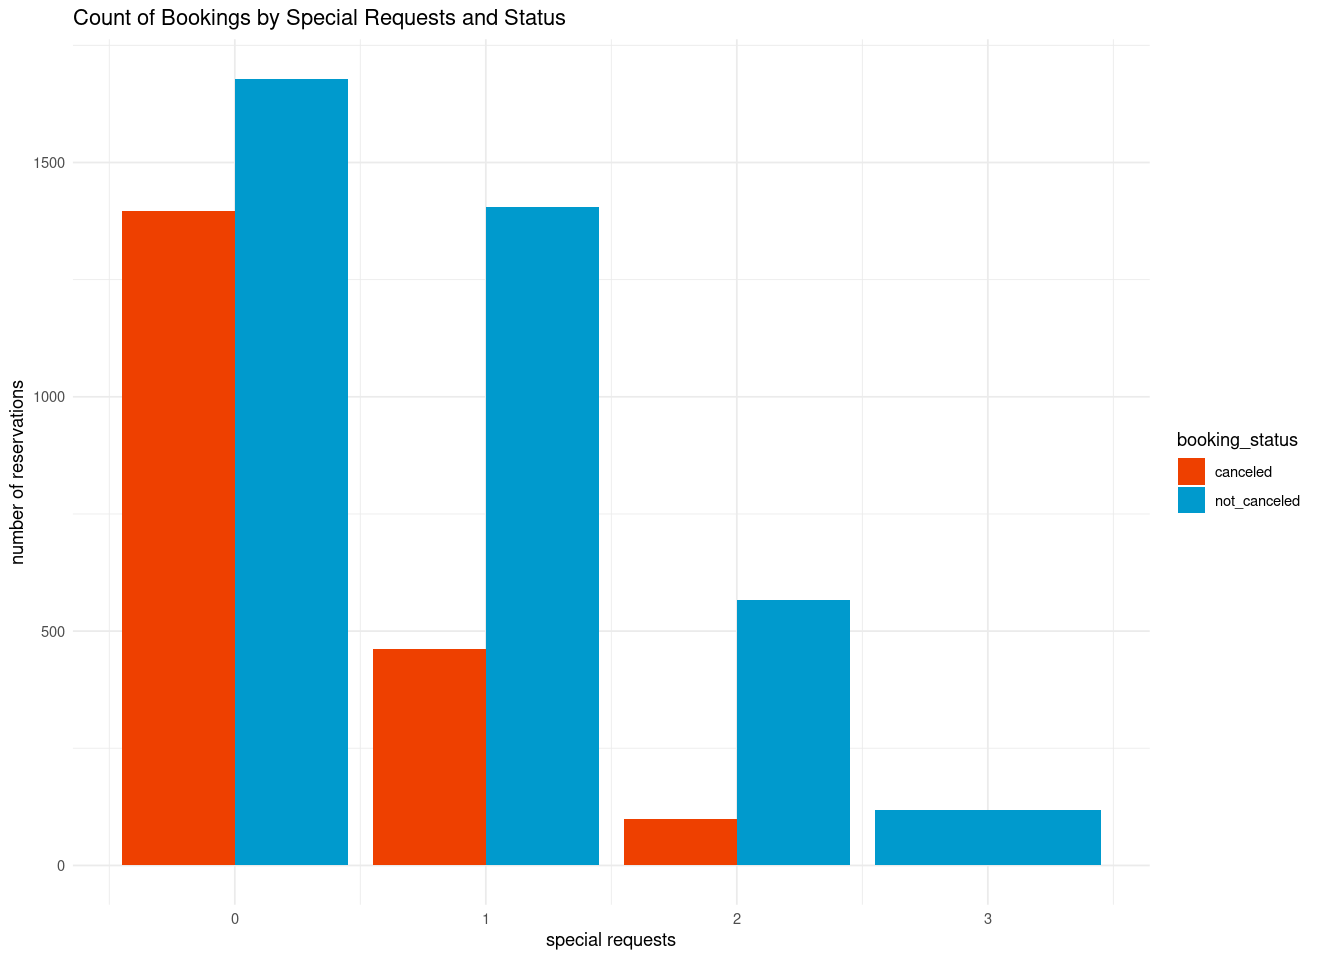

reserved_parking_space,booking_status,percentage_canceled_parking
<dbl>,<fct>,<dbl>
0,canceled,40.16
0,not_canceled,59.84
1,canceled,13.84
1,not_canceled,86.16


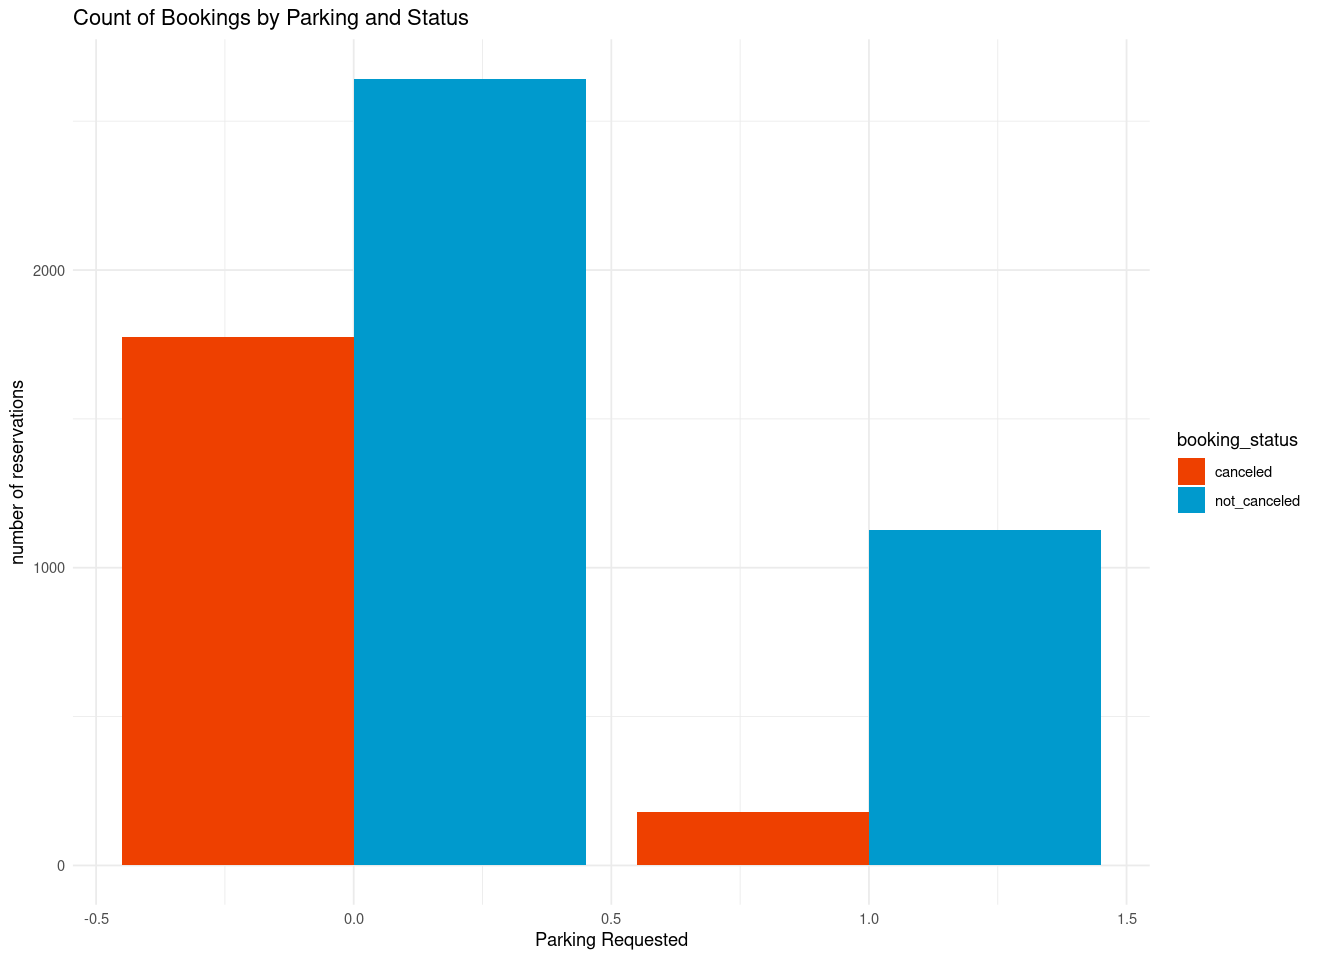

In [10]:
ggplot(bookings_df, aes(x=special_requests, fill=booking_status)) +
geom_bar(position='dodge')+
theme_minimal()+
scale_fill_manual(values=c("orangered2", "deepskyblue3"))+
labs(title= 'Count of Bookings by Special Requests and Status', y='number of reservations', x='special requests')

percent_req <- bookings_df %>%
	group_by(special_requests) %>%
	mutate(count=n())%>%
	group_by(special_requests,booking_status) %>%
	mutate(count_book = n())%>%
	reframe(percentage_canceled_req = round(((count_book/count)*100),2))%>%
	unique()
percent_req


ggplot(bookings_df, aes(x=reserved_parking_space, fill=booking_status)) +
geom_bar(position='dodge')+
scale_fill_manual(values=c("orangered2", "deepskyblue3"))+
theme_minimal()+
labs(title= 'Count of Bookings by Parking and Status', y='number of reservations', x='Parking Requested')


percent_park <- bookings_df %>%
	group_by(reserved_parking_space) %>%
	mutate(count=n())%>%
	group_by(reserved_parking_space,booking_status) %>%
	mutate(count_book = n())%>%
	reframe(percentage_canceled_parking = round(((count_book/count)*100),2))%>%
	unique()
percent_park


# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the outcome variable,`booking_status`.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `bookings_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [91]:
# Run this R code to install ML packages that you might need (Will take about 1 minute)
install.packages('vip')
library(vip)
library(tidymodels)
library(discrim)

Installing vip [0.4.1] ...
	OK [linked cache]


## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [92]:
set.seed(24)

booking_split <- initial_split(bookings_df, prop =0.75,
							  strata = booking_status)

booking_training <- booking_split %>%
	training()

booking_test <- booking_split %>%
	testing()

In [93]:
set.seed(24)
booking_folds <- vfold_cv(booking_training, v=5)

#specify metrics
my_metrics <- metric_set(accuracy, sens, spec, f_meas, roc_auc)

## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [94]:
booking_recipe <- recipe(booking_status ~ ., data = booking_training) %>%
	step_YeoJohnson(all_numeric(), -all_outcomes())%>%
	step_normalize(all_numeric(), -all_outcomes())%>%
	step_dummy(all_nominal(), -all_outcomes())
	

In [95]:
#test pipeline
baked_booking_training <- booking_recipe %>%
	prep(training = booking_training) %>%
	bake(new_data=NULL)

head(baked_booking_training)

previous_cancellations,previous_non_canceled_bookings,adults,children,weekend_nights,week_nights,room_price,special_requests,reserved_parking_space,lead_time_days,⋯,meal_plan_continental,meal_plan_american,meal_plan_modified_american,room_type_studio,room_type_suite,room_type_presidential_suite,room_type_executive_suite,arrival_occupancy_season_low,arrival_occupancy_season_moderate,arrival_occupancy_season_peak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.0890598,-0.1136822,0.5243646,-0.2756976,0.6262464,-0.78527063,0.9322839,-0.8072622,-0.5531572,0.4360609,⋯,1,0,0,0,1,0,0,0,1,0
-0.0890598,-0.1136822,0.5243646,-0.2756976,-0.9811798,-0.78527063,-0.9367321,-0.8072622,-0.5531572,0.8565823,⋯,0,1,0,0,1,0,0,0,0,1
-0.0890598,-0.1136822,0.5243646,-0.2756976,0.6262464,0.06478343,-1.7969028,-0.8072622,-0.5531572,2.1375994,⋯,1,0,0,0,1,0,0,0,1,0
-0.0890598,-0.1136822,0.5243646,-0.2756976,-0.9811798,0.73386937,1.6826749,0.4796210,-0.5531572,-0.2376659,⋯,1,0,0,1,0,0,0,0,1,0
-0.0890598,-0.1136822,0.5243646,-0.2756976,-0.9811798,-0.78527063,-0.6848316,-0.8072622,1.8073833,0.3319691,⋯,1,0,0,0,1,0,0,0,1,0
-0.0890598,-0.1136822,0.5243646,-0.2756976,-0.9811798,0.06478343,-1.4384992,-0.8072622,-0.5531572,-0.8097520,⋯,0,1,0,0,1,0,0,1,0,0


## Model 1 Training
Logistic Regression

In [96]:
set.seed(24)
#set the model
logistic_model <- logistic_reg() %>%
	set_engine('glm') %>%
	set_mode('classification')

#create workflow
log_wf <- workflow() %>%
	add_model(logistic_model) %>%
	add_recipe(booking_recipe)

#fit workflow with last fit
log_fit <- log_wf %>%
	last_fit(split = booking_split,
			metrics = my_metrics)

→ A | warning: prediction from a rank-deficient fit may be misleading

There were issues with some computations   A: x1

There were issues with some computations   A: x1





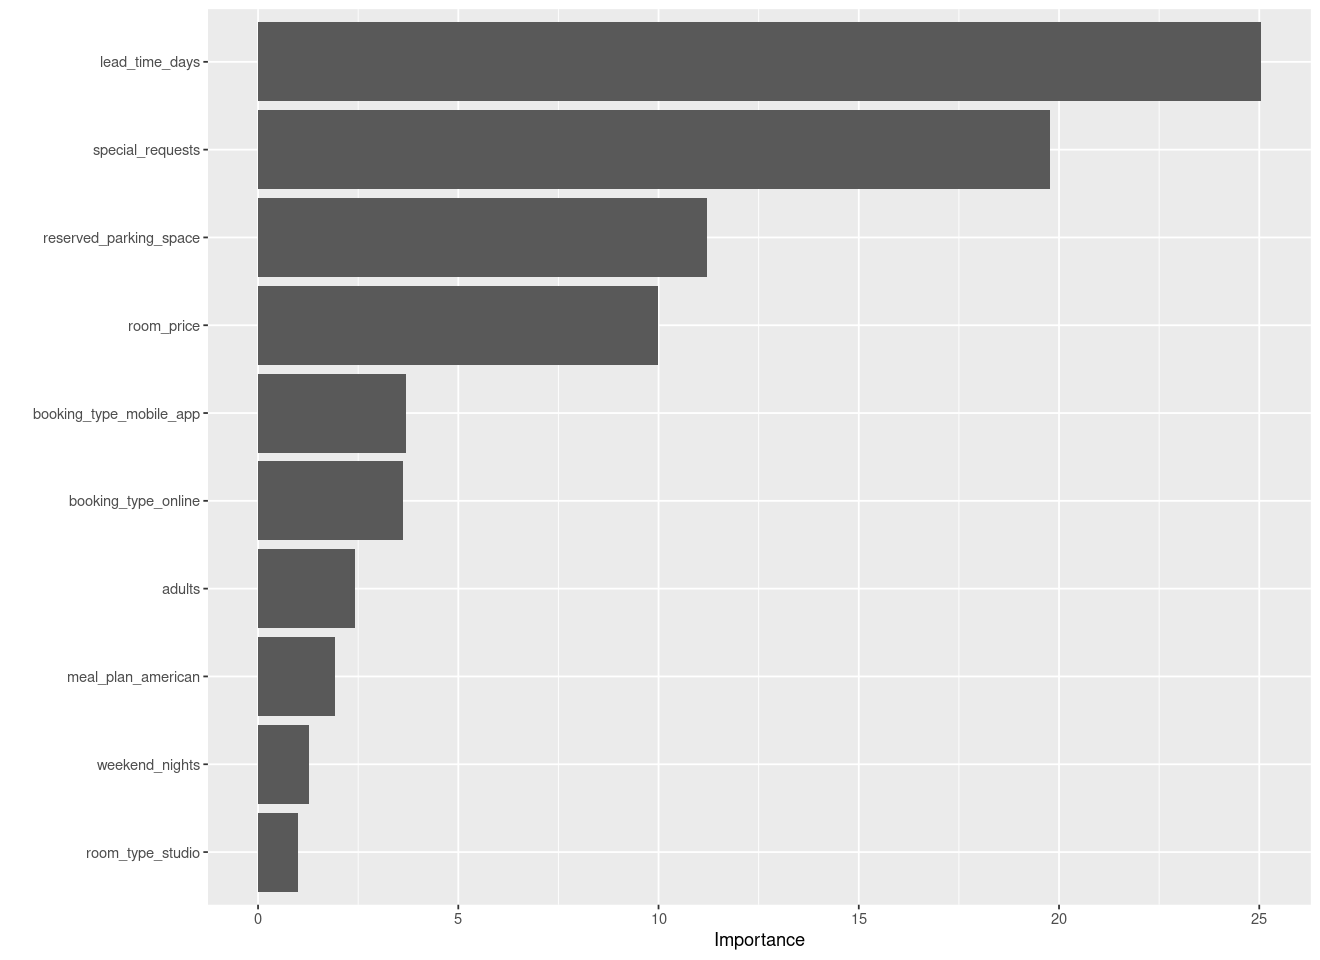

In [97]:
booking_trained_model <-
	log_fit %>%
	extract_fit_parsnip()

vip(booking_trained_model)

## Model 1 Performance Evaluation

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8072626,Preprocessor1_Model1
sens,binary,0.6830266,Preprocessor1_Model1
spec,binary,0.8716861,Preprocessor1_Model1
f_meas,binary,0.7076271,Preprocessor1_Model1
roc_auc,binary,0.8731022,Preprocessor1_Model1


id,.pred_class,.row,.pred_canceled,.pred_not_canceled,booking_status,.config
<chr>,<fct>,<int>,<dbl>,<dbl>,<fct>,<chr>
train/test split,canceled,4,0.851839586,0.14816041,canceled,Preprocessor1_Model1
train/test split,not_canceled,7,0.010419092,0.98958091,not_canceled,Preprocessor1_Model1
train/test split,not_canceled,8,0.041697279,0.95830272,not_canceled,Preprocessor1_Model1
train/test split,canceled,15,0.909289530,0.09071047,canceled,Preprocessor1_Model1
train/test split,not_canceled,17,0.435561208,0.56443879,not_canceled,Preprocessor1_Model1
train/test split,not_canceled,20,0.311031275,0.68896873,not_canceled,Preprocessor1_Model1
train/test split,not_canceled,27,0.021497164,0.97850284,not_canceled,Preprocessor1_Model1
train/test split,not_canceled,30,0.009638292,0.99036171,not_canceled,Preprocessor1_Model1
train/test split,not_canceled,33,0.214363567,0.78563643,not_canceled,Preprocessor1_Model1


              Truth
Prediction     canceled not_canceled
  canceled          334          121
  not_canceled      155          822

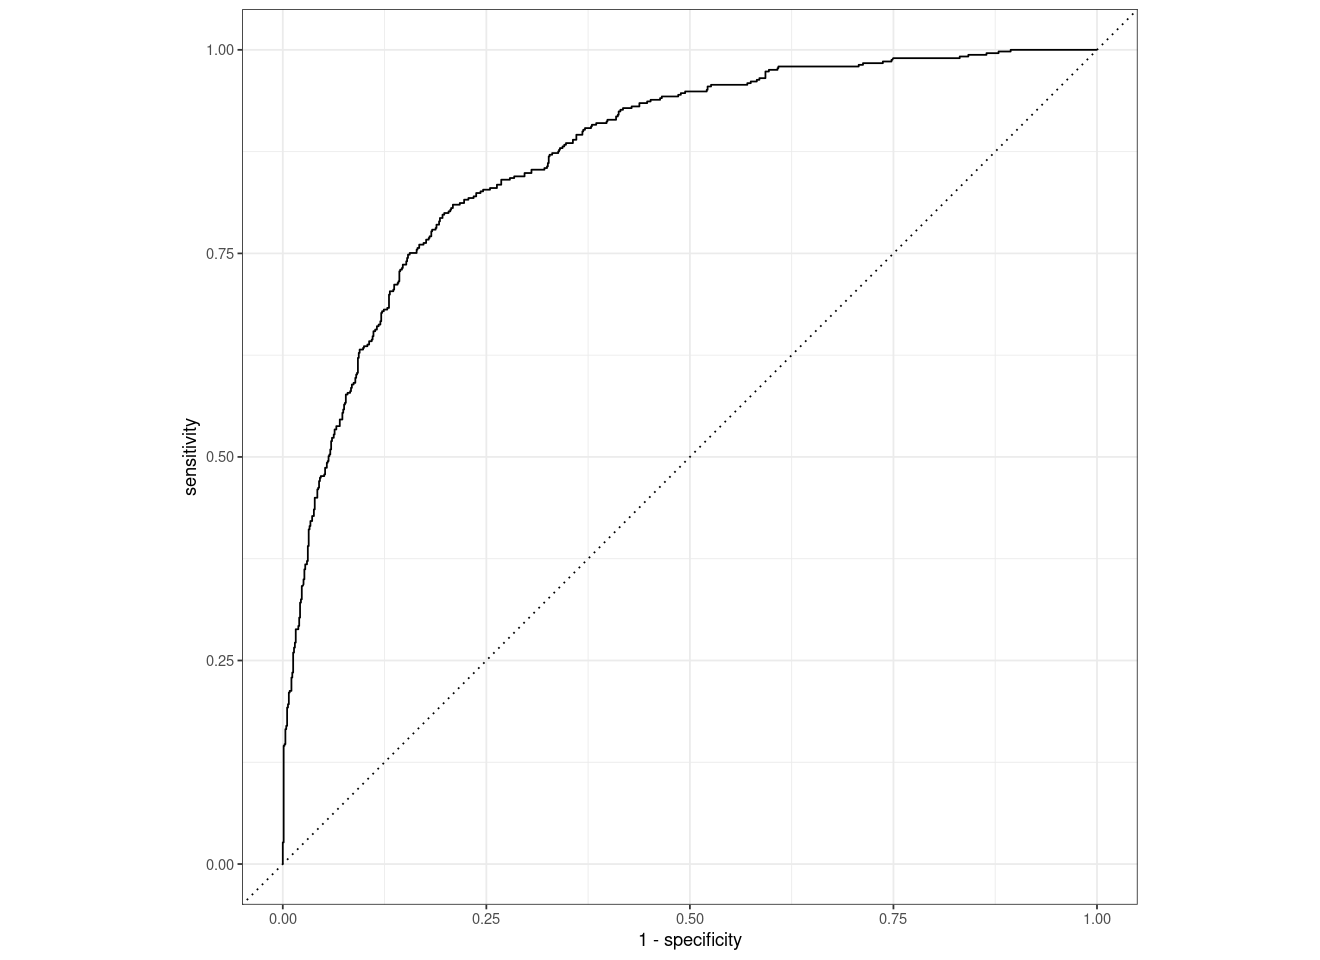

In [99]:
#collect metrics
log_fit %>%
	collect_metrics()

#collect predictions
last_fit_log_results <- 
  log_fit %>% 
  collect_predictions()

last_fit_log_results

#confusion matrix
conf_mat(last_fit_log_results, truth = booking_status, estimate=.pred_class)

#roc curve
roc_curve(last_fit_log_results, truth = booking_status, .pred_canceled) %>% 
	autoplot()

## Model 2 Training
KNN

In [101]:
set.seed(24)
#set model
knn_model <- 
  nearest_neighbor(neighbors = tune()) %>% 
  set_engine('kknn') %>% 
  set_mode('classification')

#create workflow
knn_wf <- 
  workflow() %>% 
  add_model(knn_model) %>% 
  add_recipe(booking_recipe)

#create grid of parameters to tune using random grid
k_grid <- 
	grid_random(neighbors() %>% range_set(c(10,100)),
			   size=10)
k_grid

set.seed(24)
#tune model
knn_tuning <- knn_wf %>%
	tune_grid(resamples = booking_folds, grid = k_grid)

knn_tuning %>% show_best('roc_auc')

#set best
best_k <- knn_tuning %>% select_best('roc_auc')


neighbors
<int>
28
81
96
43
44
38
19
65
63


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
28,roc_auc,binary,0.8598949,5,0.001985974,Preprocessor1_Model02
38,roc_auc,binary,0.8595115,5,0.002424229,Preprocessor1_Model03
43,roc_auc,binary,0.8590769,5,0.002685837,Preprocessor1_Model04
44,roc_auc,binary,0.8590411,5,0.002677470,Preprocessor1_Model05
19,roc_auc,binary,0.8580810,5,0.001980021,Preprocessor1_Model01


In [102]:
#finalize workflow with hyperparameter
final_knn_wf <- 
  knn_wf %>% 
  finalize_workflow(best_k)

#fit model
last_fit_knn <- final_knn_wf %>% 
                last_fit(split = booking_split,
						metrics=my_metrics)

## Model 2 Performance Evaluation

In [103]:
#collect metrics
last_fit_knn %>% collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8351955,Preprocessor1_Model1
sens,binary,0.7157464,Preprocessor1_Model1
spec,binary,0.8971368,Preprocessor1_Model1
f_meas,binary,0.7478632,Preprocessor1_Model1
roc_auc,binary,0.8856823,Preprocessor1_Model1


id,.pred_class,.row,.pred_canceled,.pred_not_canceled,booking_status,.config
<chr>,<fct>,<int>,<dbl>,<dbl>,<fct>,<chr>
train/test split,canceled,4,0.718660455,0.28133955,canceled,Preprocessor1_Model1
train/test split,not_canceled,7,0.097903948,0.90209605,not_canceled,Preprocessor1_Model1
train/test split,not_canceled,8,0.308305262,0.69169474,not_canceled,Preprocessor1_Model1
train/test split,canceled,15,0.784743226,0.21525677,canceled,Preprocessor1_Model1
train/test split,not_canceled,17,0.392692018,0.60730798,not_canceled,Preprocessor1_Model1
train/test split,not_canceled,20,0.330260169,0.66973983,not_canceled,Preprocessor1_Model1
train/test split,not_canceled,27,0.025629341,0.97437066,not_canceled,Preprocessor1_Model1
train/test split,not_canceled,30,0.056057842,0.94394216,not_canceled,Preprocessor1_Model1
train/test split,not_canceled,33,0.058926635,0.94107336,not_canceled,Preprocessor1_Model1


              Truth
Prediction     canceled not_canceled
  canceled          350           97
  not_canceled      139          846

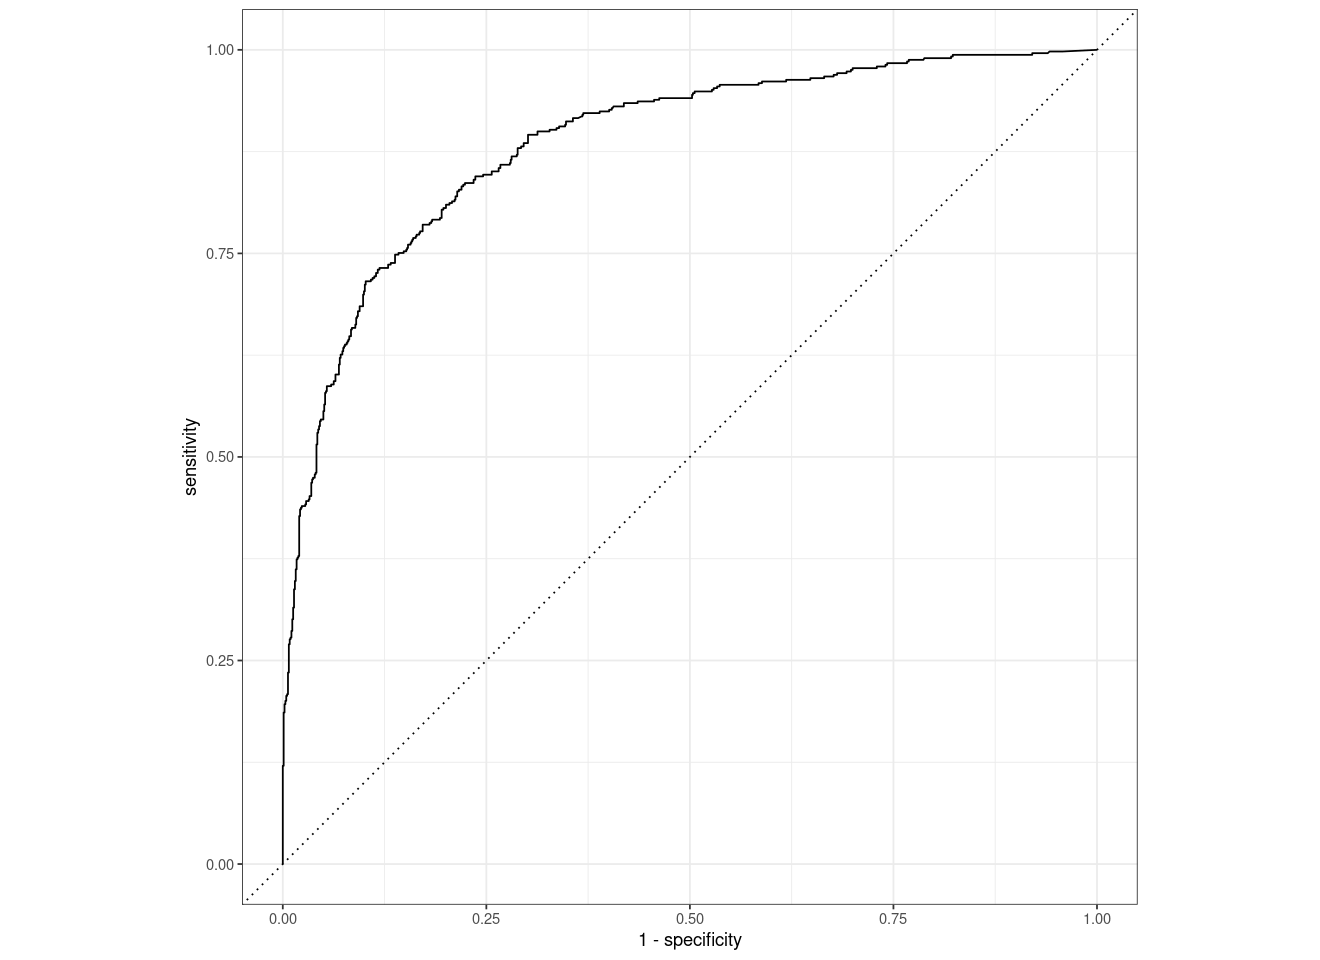

In [104]:
#collect predictions
last_fit_knn_results <- 
  last_fit_knn %>% 
  collect_predictions()

last_fit_knn_results

#confusion matrix
conf_mat(last_fit_knn_results, truth = booking_status, estimate=.pred_class)

#roc curve
roc_curve(last_fit_knn_results, truth = booking_status, .pred_canceled) %>% 
	autoplot()

## Model 3 Training
Random Forest

In [111]:
set.seed(24)
#set model
rf_model <- 
  rand_forest(mtry = tune(),
              trees = tune(),
              min_n = tune()) %>% 
  set_engine('ranger', importance = "impurity") %>% 
  set_mode('classification')

#create workflow
rf_workflow <- 
  workflow() %>% 
  add_model(rf_model) %>% 
  add_recipe(booking_recipe)

#create grid of parameters to tune using random grid
rf_grid <- 
  grid_random(mtry() %>% range_set(c(5, 15)),
              trees(),
              min_n(),
              size = 10)

set.seed(24)
#tune model
rf_tuning <- 
  rf_workflow %>% 
  tune_grid(resamples = booking_folds, grid = rf_grid)

rf_tuning %>% show_best('roc_auc')

#set best
best_rf <- rf_tuning %>% 
  select_best(metric = 'roc_auc')


mtry,trees,min_n,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
10,904,13,roc_auc,binary,0.9132133,5,0.003462252,Preprocessor1_Model09
14,849,9,roc_auc,binary,0.9124911,5,0.003652914,Preprocessor1_Model07
6,1911,13,roc_auc,binary,0.9122541,5,0.003584671,Preprocessor1_Model05
12,1097,17,roc_auc,binary,0.9120049,5,0.003622802,Preprocessor1_Model03
11,520,22,roc_auc,binary,0.9118426,5,0.003472317,Preprocessor1_Model04


In [112]:
#finalize workflow
final_rf_wf <- 
  rf_workflow %>% 
  finalize_workflow(best_rf)

#fit model
last_fit_rf <- final_rf_wf %>% 
                last_fit(split = booking_split,
						metrics=my_metrics)

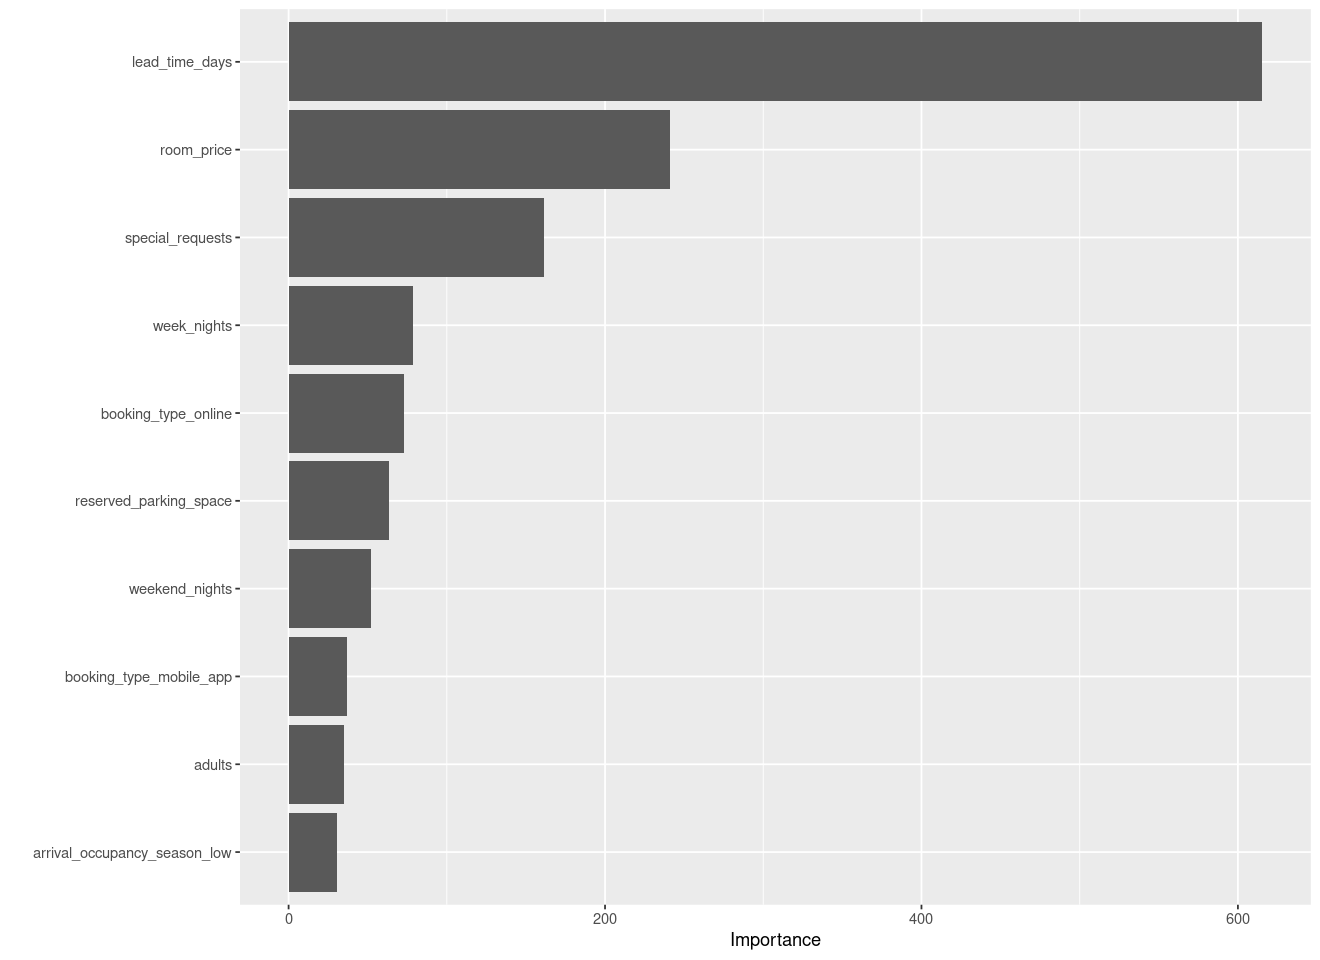

In [113]:
#vip
rf_tree_wf_fit <- 
  final_rf_wf %>% 
  fit(data = booking_training)

rf_tree_fit <- rf_tree_wf_fit%>%
	extract_fit_parsnip()

vip(rf_tree_fit)

## Model 3 Performance Evaluation

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8750000,Preprocessor1_Model1
sens,binary,0.7484663,Preprocessor1_Model1
spec,binary,0.9406151,Preprocessor1_Model1
f_meas,binary,0.8035126,Preprocessor1_Model1
roc_auc,binary,0.9285056,Preprocessor1_Model1


id,.pred_class,.row,.pred_canceled,.pred_not_canceled,booking_status,.config
<chr>,<fct>,<int>,<dbl>,<dbl>,<fct>,<chr>
train/test split,canceled,4,0.930722691,0.069277309,canceled,Preprocessor1_Model1
train/test split,not_canceled,7,0.007686003,0.992313997,not_canceled,Preprocessor1_Model1
train/test split,not_canceled,8,0.026847440,0.973152560,not_canceled,Preprocessor1_Model1
train/test split,canceled,15,0.962527025,0.037472975,canceled,Preprocessor1_Model1
train/test split,not_canceled,17,0.407979980,0.592020020,not_canceled,Preprocessor1_Model1
train/test split,not_canceled,20,0.242006883,0.757993117,not_canceled,Preprocessor1_Model1
train/test split,not_canceled,27,0.040290826,0.959709174,not_canceled,Preprocessor1_Model1
train/test split,not_canceled,30,0.207133166,0.792866834,not_canceled,Preprocessor1_Model1
train/test split,not_canceled,33,0.090540009,0.909459991,not_canceled,Preprocessor1_Model1


              Truth
Prediction     canceled not_canceled
  canceled          366           56
  not_canceled      123          887

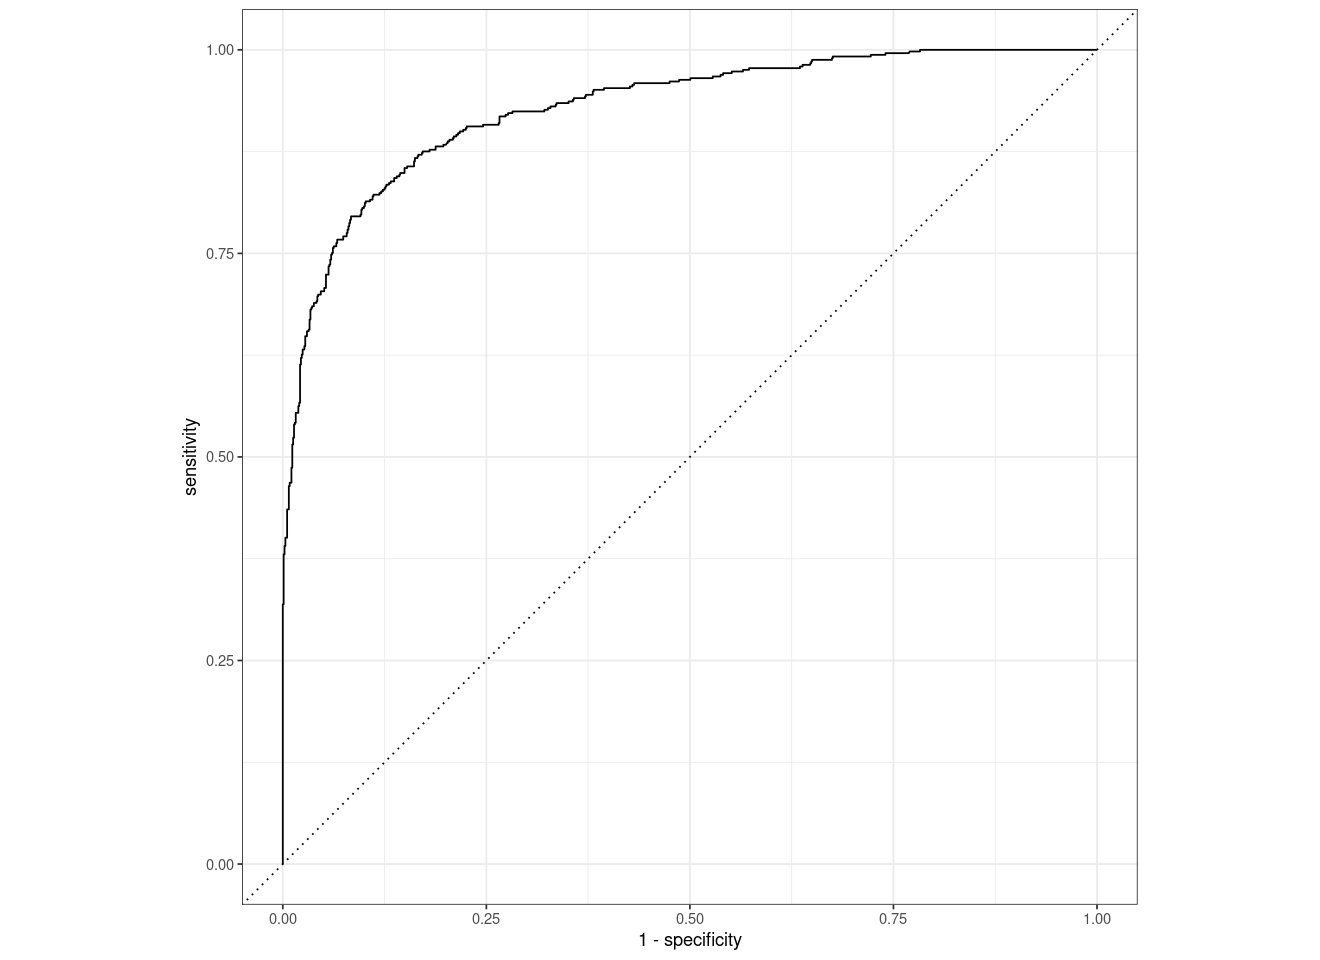

In [114]:
#collect metrics
last_fit_rf %>% collect_metrics()
#collect predictions
last_fit_rf_results <- 
  last_fit_rf %>% 
  collect_predictions()

last_fit_rf_results

#confusion matrix
conf_mat(last_fit_rf_results, truth = booking_status, estimate=.pred_class)

#roc curve
roc_curve(last_fit_rf_results, truth = booking_status, .pred_canceled) %>% 
	autoplot()

# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at the hotel. Think of this section as your closing remarks of a presentation, where you summarize your key findings, model performance, and make recommendations to improve customer retention and services at the hotel.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a hotel with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

## Introduction

In this project, we are asked to analyze booking data from a hotel experiencing record levels of cancelations. The hotel wants to better identify factors that lead to canceled bookings in order to decrease their loss with unoccupied rooms. Understanding a customer’s risk of cancelation and maximizing occupancy will help the hotel maintain profit and thus aide in its future success.

The goal of this analysis is to identify booking factors that relate to canceled and non-canceled reservations. Understanding common factors in canceled and non-canceled reservations can help the hotel better identify customers that will likely keep or cancel their reservation. With these key factors in mind, we can create a model that predicts cancelations based on an understating of the exploratory data analysis. In addition to predicting cancelations, the hotel can leverage these insights and key factors to try and minimize cancelations to increase profit. 

## Key Findings

In the exploratory data analysis, we analyzed relationships of various factors to booking status, canceled or non-canceled. Firstly, noting the presence of a relationship with cancelations, the proportion of canceled rooms increased from low to moderate to peak occupancy seasons. This is important as peak occupancy season has high potential earning value and almost half of the reservations cancel, decreasing potential profits. Looking at booking type, we see about 1/3rd of reservations booked online, in the app, and through a travel agency cancel while a majority of reservations through corporate partnerships do not. This insight suggests that increasing reservations through corporate partnerships could increase non-cancelations. When analyzing bookings with “add-ons” such as parking or special requests, most customers did not cancel their reservation compared to those who did not add parking or special requests. This helps the hotel know that those bookings with “add-ons” are likely not to cancel. Additionally, those who have previously booked with the hotel, either canceled before or stayed before, are also likely not to cancel. Lastly, most non-canceled bookings tended to be reserved later, with less lead time before their stay, whereas canceled bookings had no trend in lead time, suggesting bookings with less lead time are less likely to cancel. Although analyzed in the data set, there was no relationship between booking status and the price of the reservation or the length of stay.

## Modeling Results

To predict future reservation cancelations, we modeled the predictor variables, booking features, and their booking status using logistic regression, K nearest neighbors, and a random forest model. Of the three models tested, the random forest model had the highest accuracy in predicting canceled reservations. It also had the highest ROC AUC. ROC AUC has a maximum value of 1 when a model has zero mistakes in its true negatives (non-cancelations) and 100% accuracy in its real positives (cancelations). The random forest had an ROC AUC of 0.9285 out of 1. In terms of a letter grade we can compare this metric to an ”A”.  The proportion of canceled bookings correctly predicted as canceled (sensitivity) was 0.7485 and the proportion of non-canceled bookings that were correctly predicted (specificity) was 0.9406. Looking at the confusion matrix of our predicted and actual booking sates, we see that the model has a low number of false positives, those that we predicted would cancel but do not. It is important that the hotel has a low false positive rate because if they predicted someone would cancel and over book, in hopes of increasing occupancy and profit,  they may not have rooms available. On the other hand, predicting a reservation will not cancel but actually canceling might have an impact on profit but will not negatively affect potential customers. As seen in the exploratory data analysis, many non-cancelled reservations occur with minimal lead time so these false positives, while still important to keep low, could open up rooms for late booking guests.

## Recommendations

Throughout this analysis, we looked at different factors that relate to booking status, canceled or non-canceled and created a model to predict cancelations. Looking at the variable importance from fitting our “best” model, random forest, we see that the lead time before staying is highly influential in our model. Similarly, in our exploratory data analysis, we saw that many non-canceled reservations had less lead time compared to canceled reservations. With this in mind, the hotel could target customers who plan to book closer to their stay time with room deals or promotions. This could increase the number of bookings and, with less time before arrival, decrease cancelations helping the hotel maintain profit. Special requests were also in the top 3 factors of variable importance and a factor we analyzed that had a relationship to booking status. The hotel could try advertising their special requests or accommodations to increase bookings with special requests which, compared to no special request bookings, cancel less often. With our model, the hotel can keep track of reservations they predict to cancel and create solutions to increase their profit such as a late cancel fee or encourage them to not cancel by adding special deals on parking or meal plans. Additionally, the hotel should work on maintaining relationships with past customers as almost 100% don’t cancel their reservation. Implementing these recommendations, the hotel could start to see an increase in their profit and decrease in their canceled reservations leading to their future growth and success. 